Tinkering with the data

In [1]:
import netCDF4 as nc
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import Image, display

In [2]:
# open 'dat/RBC_Output.nc' file
# file = nc.Dataset('../dat/RBC_Output.nc', 'r')
file = xr.open_dataset('../dat/RBC_Output700.nc')

C:\Users\deban\AppData\Local\Temp\ipykernel_42540\3695546453.py:3: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  file = xr.open_dataset('../dat/RBC_Output700.nc')


In [3]:
# we don't need s and ζ, remove them
file = file.drop_vars(['s', 'ζ'])

In [4]:
print(file) 

<xarray.Dataset> Size: 211MB
Dimensions:  (time: 201, x_faa: 256, x_caa: 256, z_aaf: 257, z_aac: 256)
Coordinates:
  * time     (time) timedelta64[ns] 2kB 00:00:00 00:00:00.500000 ... 00:01:40
  * x_faa    (x_faa) float32 1kB -1.0 -0.9922 -0.9844 ... 0.9766 0.9844 0.9922
  * x_caa    (x_caa) float32 1kB -0.9961 -0.9883 -0.9805 ... 0.9883 0.9961
  * z_aaf    (z_aaf) float32 1kB -1.0 -0.9961 -0.9922 ... -0.003906 0.0
  * z_aac    (z_aac) float32 1kB -0.998 -0.9941 -0.9902 ... -0.005859 -0.001953
Data variables:
    Δx_caa   (x_caa) float32 1kB ...
    Δx_faa   (x_faa) float32 1kB ...
    Δz_aac   (z_aac) float32 1kB ...
    Δz_aaf   (z_aaf) float32 1kB ...
    b        (time, z_aac, x_caa) float32 53MB ...
    p_dyn    (time, z_aac, x_caa) float32 53MB ...
    u        (time, z_aac, x_faa) float32 53MB ...
    w        (time, z_aaf, x_caa) float32 53MB ...
Attributes:
    Julia:                 This file was generated using Julia Version 1.11.5...
    Oceananigans:          This file was

In [5]:
for var_name in file.data_vars:
    data = file[var_name]
    # For large arrays, print only unique values for 1D variables, and min/max for higher dimensions
    print(f"\nVariable: {var_name}")
    if data.ndim == 1:
        unique_vals = np.unique(data.values)
        print(f"Unique values ({len(unique_vals)}): {unique_vals}")
    else:
        print(f"Shape: {data.shape}, dtype: {data.dtype}")
        print(f"Min: {data.values.min()}, Max: {data.values.max()}")


Variable: Δx_caa
Unique values (1): [0.0078125]

Variable: Δx_faa
Unique values (1): [0.0078125]

Variable: Δz_aac
Unique values (1): [0.00390625]

Variable: Δz_aaf
Unique values (1): [0.00390625]

Variable: b
Shape: (201, 256, 256), dtype: float32
Min: -0.029749838635325432, Max: 1.0209267139434814

Variable: p_dyn
Shape: (201, 256, 256), dtype: float32
Min: -0.5016331672668457, Max: -0.001537500647827983

Variable: u
Shape: (201, 256, 256), dtype: float32
Min: -0.04208539426326752, Max: 0.0452718622982502

Variable: w
Shape: (201, 257, 256), dtype: float32
Min: -0.06114979460835457, Max: 0.039780277758836746


<xarray.DataArray 'b' (time: 201, z_aac: 256, x_caa: 256)> Size: 53MB
array([[[ 0.009837, -0.006845, ...,  0.001587,  0.004735],
        [ 0.010634,  0.002409, ...,  0.001835,  0.006971],
        ...,
        [ 0.999056,  0.993013, ...,  0.988738,  0.994388],
        [ 0.997805,  0.998788, ...,  0.988969,  0.984093]],

       [[ 0.009051, -0.00603 , ...,  0.00162 ,  0.004744],
        [ 0.010492,  0.00306 , ...,  0.002142,  0.006686],
        ...,
        [ 0.998813,  0.99333 , ...,  0.988654,  0.995095],
        [ 0.991466,  0.992341, ...,  0.982951,  0.978165]],

       ...,

       [[ 0.002648,  0.002614, ...,  0.002528,  0.002593],
        [ 0.004858,  0.004838, ...,  0.004792,  0.004839],
        ...,
        [ 0.910121,  0.910261, ...,  0.909863,  0.909998],
        [ 0.884613,  0.884795, ...,  0.885402,  0.88454 ]],

       [[ 0.002628,  0.002622, ...,  0.002523,  0.002575],
        [ 0.004866,  0.004886, ...,  0.004803,  0.004823],
        ...,
        [ 0.909947,  0.910051, ..

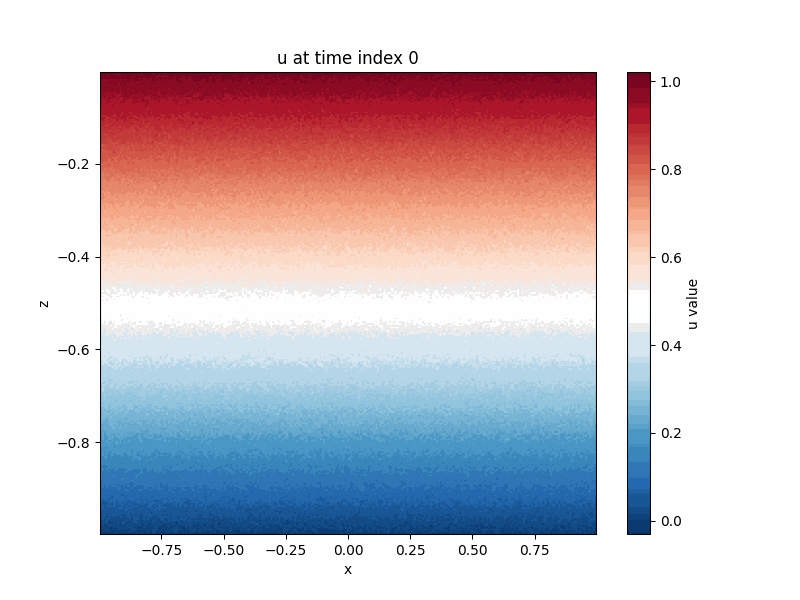

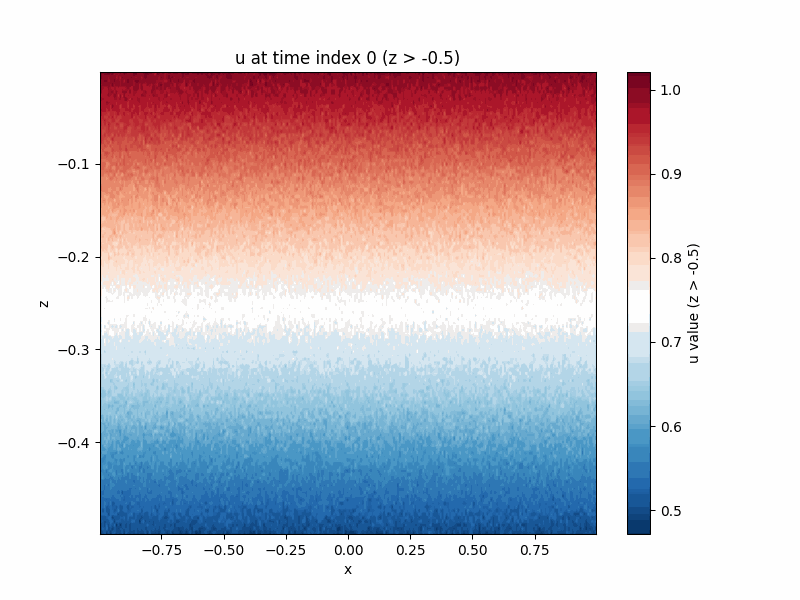

In [6]:
# Select 'u' variable (dimensions: time, z_aac, x_faa)
u = file['b']

print(u)  # Display the structure of the 'u' variable

# Extract spatial coordinates
x = u['x_caa'].values
z = u['z_aac'].values

# Prepare figure
fig, ax = plt.subplots(figsize=(8, 6))

# Initial data for imshow (time=0 gives a full z-x slice)
u_slice = u.isel(time=0).values  # shape: (z, x)

# Plot initial frame
quad = ax.imshow(u_slice, cmap='RdBu_r', origin='lower',
                 extent=[x.min(), x.max(), z.min(), z.max()],
                 aspect='auto')
cbar = plt.colorbar(quad, ax=ax, label='u value')

ax.set_title('u at time index 0')
ax.set_xlabel('x')
ax.set_ylabel('z')

# Update function
def update(frame):
    u_slice = u.isel(time=frame).values
    quad.set_data(u_slice)
    ax.set_title(f'u at time index {frame}')
    return quad,

# Create animation
ani = animation.FuncAnimation(fig, update, frames=u.sizes['time'], interval=200, blit=False)

# Save as GIF
gif_path = 'u_evolution.gif'
ani.save(gif_path, writer='pillow', fps=20)

plt.close(fig)  # Close static plot

# Display in notebook
display(Image(filename=gif_path))

#=====================================================

# do same for z> -0.5
u_above = u.where(u['z_aac'] > -0.5, drop=True)
# Prepare figure for z > -0.5
fig, ax = plt.subplots(figsize=(8, 6))
# Initial data for imshow (time=0 gives a full z-x slice)
u_above_slice = u_above.isel(time=0).values  # shape: (z, x)
# Plot initial frame for z > -0.5
quad_above = ax.imshow(u_above_slice, cmap='RdBu_r', origin='lower',
                        extent=[x.min(), x.max(), z.min()/2, z.max()/2],
                        aspect='auto')
cbar_above = plt.colorbar(quad_above, ax=ax, label='u value (z > -0.5)')
ax.set_title('u at time index 0 (z > -0.5)')
ax.set_xlabel('x')
ax.set_ylabel('z')
# Update function for z > -0.5
def update_above(frame):
    u_above_slice = u_above.isel(time=frame).values
    quad_above.set_data(u_above_slice)
    ax.set_title(f'u at time index {frame} (z > -0.5)')
    return quad_above,
# Create animation for z > -0.5
ani_above = animation.FuncAnimation(fig, update_above, frames=u_above.sizes['time'], interval=200, blit=False)
# Save as GIF for z > -0.5
gif_above_path = 'u_above_evolution.gif'
ani_above.save(gif_above_path, writer='pillow', fps=20)
plt.close(fig)  # Close static plot for z > -0.5
# Display in notebook for z > -0.5
display(Image(filename=gif_above_path))


